<b>Project Description</b>

Zyfra is a company that develops efciency solutions fo the heavy industry. We will be looking at the gold revocery process from gold ore. To study the data on extraction and purification. We will be creating an optimal predictive model that can esimate the amount of gold ore recovered during extraction. With this our model will help to optimize production and eliminate unprofitable paramers in the gold mining process.


<b>Technological Process:</b>
1. primary processing - Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.
2. Flotation - Gold ore mixture is fed into the float banks to obtain rougher Au concentrate and rougher tails (product residues with a low concentration of valuable metals).
3. Pirification - The rougher concentrate undergoes two stages of purification. After purification, we have the final concentrate and new tails.


<b>Data Description:</b>

 Data is stored in three files:<br>

- gold_recovery_train.csv
- gold_recovery_test.csv
- gold_recovery_full.csv

<b>Evaluation Metric:</b> <br>

To find out optimal model we use a new metic called sMape (symmetric Mean Absolute Percentage Error) in conjuction with a cross validation score to find our optimal model

Poject Steps:
- Data Preperation
- Data Analyzation
- Model Building
- Final Conclusioins






<b> 1. Prepare the Data</b>

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor 

1. Load Data and Explore

In [69]:
#load data into data frames
df_recovery_train = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
df_recovery_test = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
df_recovery_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')


In [70]:
df_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [71]:
df_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [72]:
df_recovery_train.duplicated().sum()

0

In [73]:
df_recovery_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [74]:
df_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [75]:
df_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [76]:
df_recovery_test.duplicated().sum()

0

In [77]:
df_recovery_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [78]:
df_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [79]:
df_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [80]:
df_recovery_full.duplicated().sum()

0

In [81]:
df_recovery_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

1.2 Check recovery is calculated fcorrectly

In [82]:
#create the recovery calc function 
def recover(input_df, C, F, T):
    rec = 100 * ((input_df[C] * (input_df[F] - input_df[T]))/ (input_df[F] * (input_df[C] - input_df[T])))
    return rec


In [83]:
#get recovery prediction and calculate the MAE
vals_pred = recover(df_recovery_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')

vals_act = df_recovery_train['rougher.output.recovery'].dropna().to_list()

print("Mean Absolute Error:", mean_absolute_error(vals_act, vals_pred))

Mean Absolute Error: 9.303415616264301e-15


The mean Absolute Error is small and suggests that the recovery output is being calcluated correctly

1.3 - Find Features not available in the test set and save them

In [84]:
features_to_drop = [feature for feature in df_recovery_train if feature not in df_recovery_test]

1.4 data preprocessing
 - will fill in missing data with values closest to the same time. We have been informed this is a viable option for filling in this data.

In [85]:
#function to fix missing data with values close to same time, drop date for model training.
def fix_data(df, x):
    if x == 1:
        df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)
    df = df.fillna(method='ffill', inplace=False)
    df.fillna(method='bfill', inplace= True)
    return df


In [86]:
#call function to fix the datasets
df_recovery_train = fix_data(df_recovery_train,1)
df_recovery_test = fix_data(df_recovery_test, 0)
df_recovery_full = fix_data(df_recovery_full, 1)

In [87]:
#remove any lasting null data
df_recovery_train.dropna(inplace=True)
df_recovery_test.dropna(inplace=True)
df_recovery_full.dropna(inplace=True)

<B>Analyze the Data</B>

In [88]:
#Create function to get total concentration of all metals at certain stages.
def metal_concen_sum(df, stage):
    metal_handles = ['_au','_pb','_au']
    total_concen = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_concen

2.1 Explore concentration of metals at each purification stage

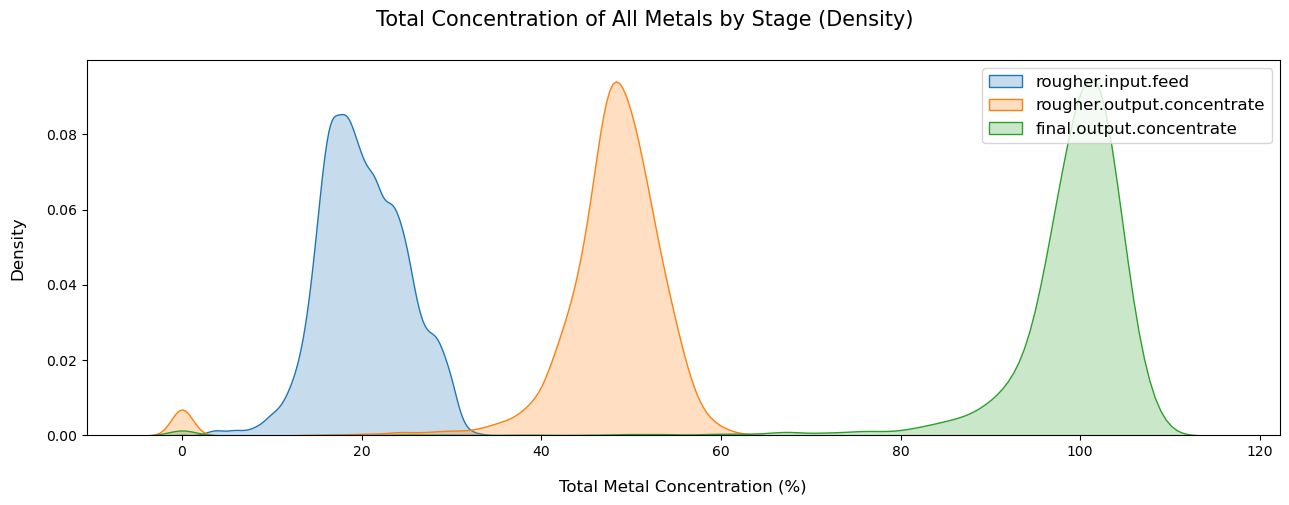

In [89]:
#Create plot to visualize total concentration of all metals at certain stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(df_recovery_full, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(df_recovery_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(df_recovery_full, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()



As the feed progresses through each stage of the purification process, the concentration of metals increases as other substances are removed.

2.2

In [90]:
df_recovery_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [91]:
df_recovery_test['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

2.2 Compare feed size particle distributions on the training and test sets

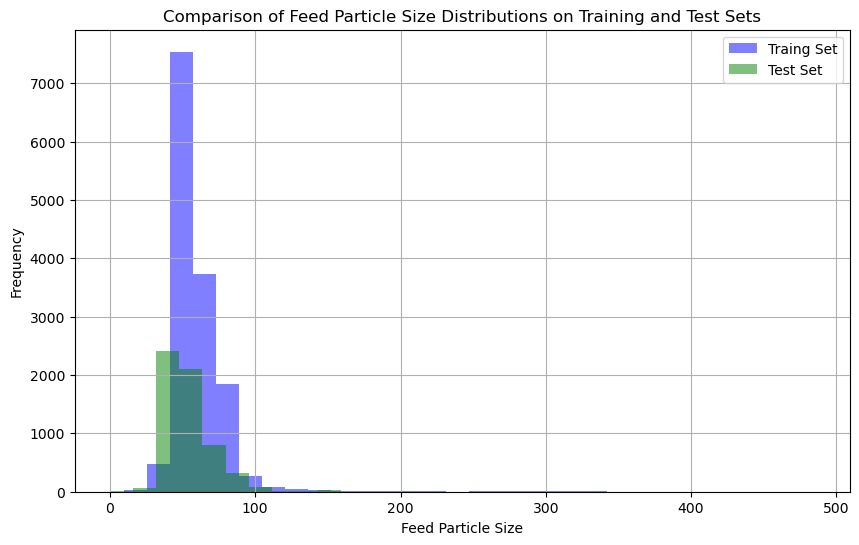

In [92]:
train_feed_size = df_recovery_train['rougher.input.feed_size']
test_feed_size = df_recovery_test['rougher.input.feed_size']


plt.figure(figsize=(10,6))
plt.hist(train_feed_size, bins=30, alpha=0.5,color='blue', label='Traing Set')
plt.hist(test_feed_size, bins=30, alpha=0.5,color='green', label='Test Set')
plt.xlabel('Feed Particle Size')
plt.ylabel('Frequency')
plt.title('Comparison of Feed Particle Size Distributions on Training and Test Sets')
plt.legend()
plt.grid(True)
plt.show()



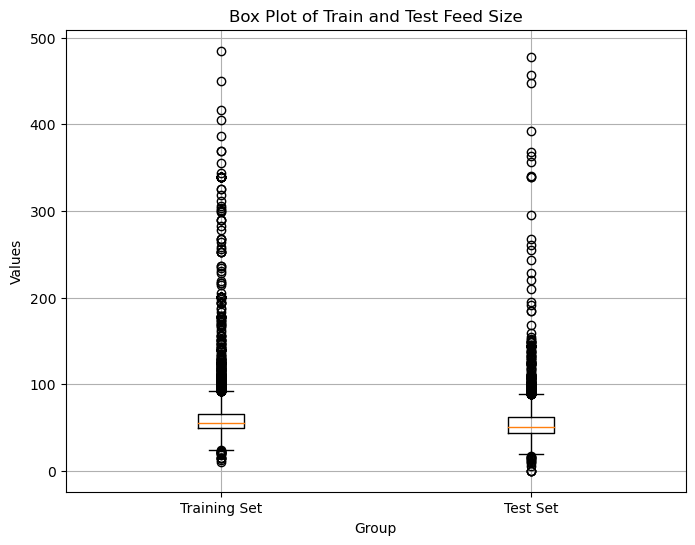

In [93]:

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([train_feed_size, test_feed_size], labels=['Training Set', 'Test Set'])
plt.xlabel('Group')
plt.ylabel('Values')
plt.title('Box Plot of Train and Test Feed Size')
plt.grid(True)
plt.show()

The boxplot shows that our datasets are similar.

In [94]:
df_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.outpu

2.3 Explore the concentration of metal types (AG,PB,SOL,AU) in each stage of the processing process. 

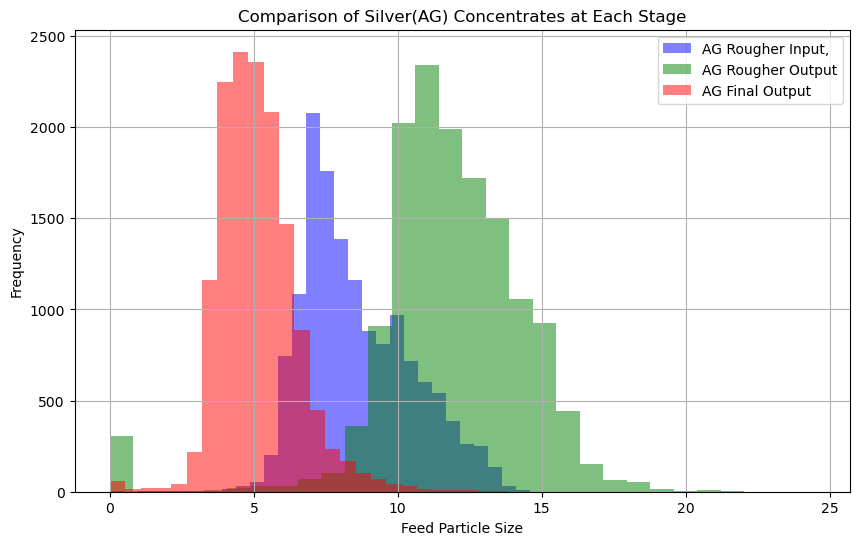

In [95]:
train_ag_raw = df_recovery_train['rougher.input.feed_ag']
train_ag_out = df_recovery_train['rougher.output.concentrate_ag']
train_ag_final =  df_recovery_train['final.output.concentrate_ag']
#train_au_raw = df_recovery_train['rougher.input.feed_au']

plt.figure(figsize=(10,6))
plt.hist(train_ag_raw, bins=30, alpha=0.5,color='blue', label='AG Rougher Input,')
plt.hist(train_ag_out , bins=30, alpha=0.5,color='green', label='AG Rougher Output')
plt.hist(train_ag_final, bins=30, alpha=0.5,color='red', label='AG Final Output')

plt.xlabel('Feed Particle Size')
plt.ylabel('Frequency')
plt.title('Comparison of Silver(AG) Concentrates at Each Stage')
plt.legend()
plt.grid(True)
plt.show()

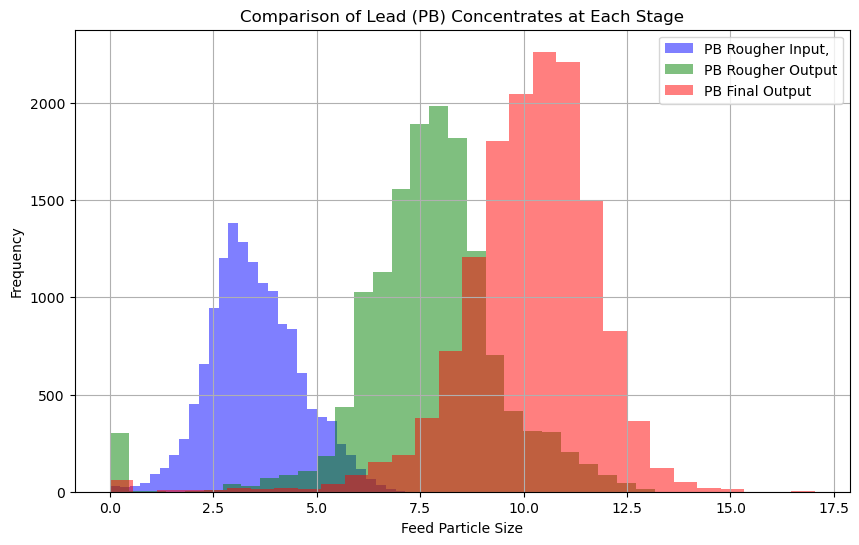

In [96]:
train_pb_raw = df_recovery_train['rougher.input.feed_pb']
train_pb_out = df_recovery_train['rougher.output.concentrate_pb']
train_pb_final =  df_recovery_train['final.output.concentrate_pb']


plt.figure(figsize=(10,6))
plt.hist(train_pb_raw, bins=30, alpha=0.5,color='blue', label='PB Rougher Input,')
plt.hist(train_pb_out , bins=30, alpha=0.5,color='green', label='PB Rougher Output')
plt.hist(train_pb_final, bins=30, alpha=0.5,color='red', label='PB Final Output')
plt.xlabel('Feed Particle Size')
plt.ylabel('Frequency')
plt.title('Comparison of Lead (PB) Concentrates at Each Stage')
plt.legend()
plt.grid(True)
plt.show()




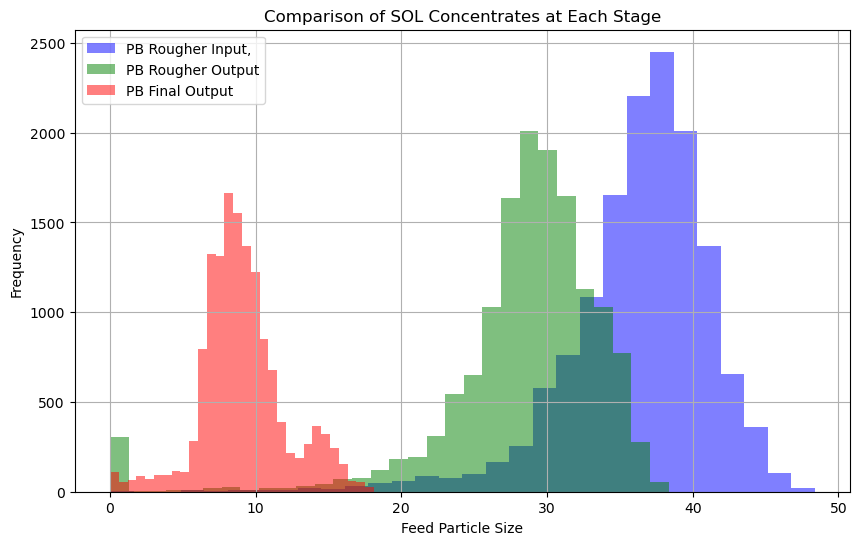

In [123]:
train_sol_raw = df_recovery_train['rougher.input.feed_sol']
train_sol_out = df_recovery_train['rougher.output.concentrate_sol']
train_sol_final =  df_recovery_train['final.output.concentrate_sol']


plt.figure(figsize=(10,6))
plt.hist(train_sol_raw, bins=30, alpha=0.5,color='blue', label='PB Rougher Input,')
plt.hist(train_sol_out , bins=30, alpha=0.5,color='green', label='PB Rougher Output')
plt.hist(train_sol_final, bins=30, alpha=0.5,color='red', label='PB Final Output')
plt.xlabel('Feed Particle Size')
plt.ylabel('Frequency')
plt.title('Comparison of SOL Concentrates at Each Stage')
plt.legend()
plt.grid(True)
plt.show()


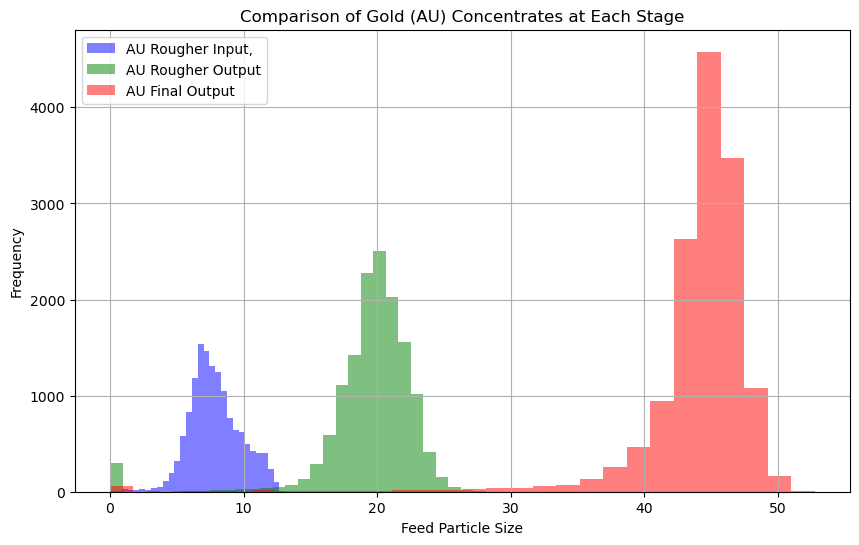

In [124]:
train_au_raw = df_recovery_train['rougher.input.feed_au']
train_au_out = df_recovery_train['rougher.output.concentrate_au']
train_au_final =  df_recovery_train['final.output.concentrate_au']


plt.figure(figsize=(10,6))
plt.hist(train_au_raw, bins=30, alpha=0.5,color='blue', label='AU Rougher Input,')
plt.hist(train_au_out , bins=30, alpha=0.5,color='green', label='AU Rougher Output')
plt.hist(train_au_final, bins=30, alpha=0.5,color='red', label='AU Final Output')
plt.xlabel('Feed Particle Size')
plt.ylabel('Frequency')
plt.title('Comparison of Gold (AU) Concentrates at Each Stage')
plt.legend()
plt.grid(True)
plt.show()



Based on our histograms, it's evident that as we progress through our process, the concentration of Gold (AU) exhibits larger particle sizes. Conversely, SOL and Silver (AG) demonstrate a trend of decreasing particle size with each successive step of the process. However, it appears that Lead (Pb) presents a persistent challenge in terms of removal.


3. Build Models
- 3.1 Create sMAPE function

In [99]:
def smape_calc(T, P):
     return (1/len(T )) * sum( abs(P - T) / ((abs(T)+ abs(P)) / 2)  * 100)


In [100]:
def final_smape (target, prediction):
    rougher_target, final_target = target['rougher.output.recovery'], target['final.output.recovery']
    rougher = smape_calc(rougher_target,prediction[:,0])
    final   = smape_calc(final_target, prediction[:,1])
    return (0.25 * rougher) + (0.75 * final)
    

In [131]:
custom_scorer = make_scorer(final_smape, greater_is_better=False)



3.2 Create training, test, and 

In [101]:
#create training
train_updated_features = df_recovery_train.drop(columns=features_to_drop)
train_updated_features.drop(columns="date", inplace=True)
train_updated_target =  df_recovery_train[['rougher.output.recovery', 'final.output.recovery']].copy()

In [102]:
#create test set
df_recovery_test_full = pd.merge(df_recovery_test, df_recovery_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='inner')
df_recovery_test_full.drop(columns="date", inplace=True)
df_test_features = df_recovery_test_full.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
df_test_targets = df_recovery_test_full[['rougher.output.recovery', 'final.output.recovery']].copy()



In [103]:
#create final test set
#df_final_features = df_recovery_full.drop(columns=features_to_drop)
#df_final_features.drop(columns="date", inplace=True)
#df_final_target =  df_recovery_full[['rougher.output.recovery', 'final.output.recovery']].copy()

3.3 Train Modeals and Evaluate

In [135]:
LR_model = LinearRegression()
LR_model.fit(train_updated_features, train_updated_target)  # train model on training set
predictions= LR_model.predict(train_updated_features)
scores = cross_val_score(LR_model, train_updated_features, train_updated_target, scoring=custom_scorer)

print("Mean sMape:", np.nanmean(scores))
print("Scores Linear Regressor", scores) 



Mean sMape: -12.38459610484714
Scores Linear Regressor [-14.40264169  -9.99308246 -12.74686745 -11.50176069 -13.27862824]


In [140]:

for depth in range(1,6):
    dt_model = DecisionTreeRegressor(random_state=12345, max_depth=depth)  
    dt_model.fit(train_updated_features, train_updated_target)

    predictions= dt_model.predict(train_updated_features)
    scores = cross_val_score(dt_model, train_updated_features, train_updated_target, scoring=custom_scorer)
    print("Depth:", depth)
    print("Mean sMape:", np.nanmean(scores))
    print("Scores Decision Tree Regressor", scores) 
    print()
    

Depth: 1
Mean sMape: -11.814257662016903
Scores Decision Tree Regressor [-11.20721278  -9.89265008 -12.14496176 -14.25129184 -11.57517185]

Depth: 2
Mean sMape: -11.434110715558434
Scores Decision Tree Regressor [-11.13456925  -8.68636707 -13.2098953  -12.76256564 -11.37715632]

Depth: 3
Mean sMape: -10.9043542236129
Scores Decision Tree Regressor [-10.34828093  -9.16324684 -12.97322059          nan -11.13266853]

Depth: 4
Mean sMape: -11.00838656011971
Scores Decision Tree Regressor [-10.24426203  -9.10166413 -12.65742038 -12.42171035 -10.61687591]

Depth: 5
Mean sMape: -10.67604637208635
Scores Decision Tree Regressor [-10.05010257  -9.46454256 -12.46512975          nan -10.72441062]



In [141]:

for depth in range(1,6):
    rf_model = RandomForestRegressor(n_estimators = 50, max_depth = depth, random_state= 12345 )
    rf_model.fit(train_updated_features, train_updated_target)
    

    predictions= rf_model.predict(train_updated_features)
    scores = cross_val_score(rf_model, train_updated_features, train_updated_target, scoring=custom_scorer)
    print("Depth:", depth)
    print("Mean sMape:", np.nanmean(scores))
    print("Scores Random Forest Regressor", scores) 
    print()



Depth: 1
Mean sMape: -11.467633375035028
Scored Random Forest Regressor [-10.81257386  -9.66843321 -11.72469188 -14.00460526 -11.12786266]

Depth: 2
Mean sMape: -11.06639599223494
Scored Random Forest Regressor [-10.22722478  -8.63422832 -12.64452378 -12.73656417 -11.08943891]

Depth: 3
Mean sMape: -10.791442984008748
Scored Random Forest Regressor [-10.05054436  -8.56507585 -12.33980713 -12.2511433  -10.75064428]

Depth: 4
Mean sMape: -10.515936365216117
Scored Random Forest Regressor [ -9.88609124  -8.55664373 -12.14546517 -11.79718984 -10.19429185]

Depth: 5
Mean sMape: -10.351681294791831
Scored Random Forest Regressor [ -9.68551304  -8.58707627 -11.88842417 -11.43936972 -10.15802327]



Dummy Regressor Model

In [142]:
dr = DummyRegressor(strategy='mean').fit(train_updated_features, train_updated_target)
dr_predict = dr.predict(df_test_features)
print("Baseline sMAPE:", final_smape(df_test_targets, dr_predict))


Baseline sMAPE: 10.289630376021062


Final Testing on our valid data set

In [146]:
rf_model = RandomForestRegressor(n_estimators = 50, max_depth = 5, random_state= 12345)
rf_model.fit(train_updated_features, train_updated_target)

predictions= rf_model.predict(df_test_features)
score = final_smape(df_test_targets, predictions)
print("sMape Radom Forest Regressor:", score)


sMape Radom Forest Regressor: 9.124243219227923


Conclusion


In summary, our analysis reveals that the Random Forest Generator, configured with a depth of 5, stands out as the optimal choice for predicting the gold recovery rate. This model yielded the most favorable sMAPE score among all tested models, underscoring its superior performance with fewer percentage errors. Specifically, our model achieved a commendable sMAPE score of 9.124243219227923 on the final testing dataset.

Furthermore, when compared with the constant baseline which came in with a score of 10.289630376021062, our model demonstrated significantly improved performance, reaffirming its efficacy and reliability in predicting gold recovery rates. 














